In [1]:
# Model to identify credit card Fraudulant transactions

C:\Users\ACER-PC\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\ACER-PC\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading data from csv file

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Checking for Null records

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Checking dataset is balanced or unbalnced 

In [9]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
# This dataset is unbalanced dataset

In [11]:
# Implementing UPSAMPLING/OVERSAMPLING using SMOTE 

In [12]:
#!pip install imblearn

In [52]:
from imblearn.combine import SMOTETomek

In [53]:
data.columns
X_cols = [col for col in data.columns if col!='Class']
X = data[X_cols]
y = data['Class']
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [54]:
smk = SMOTETomek(random_state=0)
X_res,y_res=smk.fit_sample(X,y)

In [55]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283764, 1: 283764})


In [56]:
data_ups = pd.concat([X_res,y_res],axis=1)
data_ups.shape

(567528, 31)

In [57]:
data_ups.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
# Perform standarization on dataset 

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_ups_scaled = pd.DataFrame(sc.fit_transform(data_ups),columns = data_ups.columns)

In [21]:
data_ups_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.824832,0.205142,-0.548012,1.005720,-0.302667,0.312227,0.690171,0.555310,-0.033636,0.761862,...,-0.146006,0.245904,-0.106064,0.226179,0.167353,-0.485636,0.054834,-0.149779,0.245859,-1.0
1,-1.824832,0.673313,-0.454762,0.620353,-0.598436,0.408672,0.371032,0.499569,-0.036369,0.483722,...,-0.218372,-0.537725,0.102443,-0.527304,0.230413,0.219198,-0.094876,-0.064209,-0.420772,-1.0
2,-1.824811,0.205408,-0.896708,0.881625,-0.620182,0.272307,1.474101,0.651922,-0.003688,-0.081903,...,-0.053116,0.668146,0.898146,-1.174575,-0.577305,-0.373720,-0.143577,-0.242337,1.285028,-1.0
3,-1.824811,0.277346,-0.578949,0.884842,-1.015518,0.391645,1.149954,0.554962,0.022397,-0.024574,...,-0.177396,0.012858,-0.184683,-2.075357,1.014288,-0.559057,-0.019564,0.047565,0.127351,-1.0
4,-1.824790,0.242126,-0.286496,0.845120,-0.612786,0.295551,0.475478,0.617168,-0.107860,0.965770,...,-0.142910,0.690889,-0.132633,0.363880,-0.378755,1.061389,0.145016,0.415166,-0.115428,-1.0


In [22]:
# Proceeding with classification algorithm LOGISTIC REGRESSION 

In [23]:
#Seperate data with features and label
features = data_ups_scaled.iloc[:,:-1].values
label = data_ups_scaled.iloc[:,-1].values

In [24]:
# Trying to figure out correct value for random state 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
for i in range(20,26):
    
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=i)
    
    model1 = LogisticRegression()
    model1.fit(X_train,y_train)
    
    train_score = model1.score(X_train,y_train)
    test_score = model1.score(X_test,y_test)
    
    if test_score > train_score:
        print('Test {} Train {} Seed {}'.format(test_score,train_score,i))

Test 0.9807070555795372 Train 0.9802179940931486 Seed 20
Test 0.9806806268885502 Train 0.9804294250180047 Seed 23
Test 0.9810241998713803 Train 0.980257637391559 Seed 24
Test 0.9812620580902628 Train 0.9801056714143187 Seed 25


In [26]:
#Spliting data into training and testing set 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=25)

In [27]:
#Create the model

from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [28]:
#Check the Quality of the model
# 1. Check for Generalization
# 2. Check for Score and identify whether the same is satisfactory or not

print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))

0.9801056714143187
0.9812620580902628


In [29]:
#Checking Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label, model1.predict(features))
cm

array([[281341,   2440],
       [  8720, 275061]], dtype=int64)

In [30]:
#Checking Precision, Recall, F1 score

from sklearn.metrics import classification_report
print(classification_report(label, model1.predict(features)))

              precision    recall  f1-score   support

        -1.0       0.97      0.99      0.98    283781
         1.0       0.99      0.97      0.98    283781

    accuracy                           0.98    567562
   macro avg       0.98      0.98      0.98    567562
weighted avg       0.98      0.98      0.98    567562



0.9974859555092467


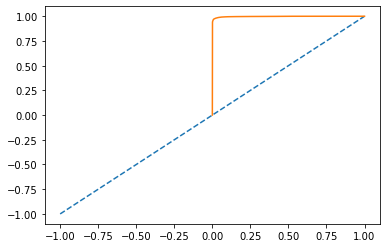

In [31]:
# Checking AUC score & plotting of ROC 

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#For plotting the curve we need the values of tpr and fpr which is calc using 
#prob values for 1 predicted by model

probabilityValues = model1.predict_proba(features)[:,1]

#Calc AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(label,probabilityValues)

#Plot Skill Line
plt.plot([-1,1],[-1,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

In [32]:
# Trying without performing Standarization 

In [ ]:
# USING LOGISTIC REGRESSION 

In [33]:
#Seperate data with features and label
features1 = data_ups.iloc[:,:-1].values
label1 = data_ups.iloc[:,-1].values


In [34]:

#Spliting data into training and testing set 

from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(features1,
                                                label1,
                                                test_size=0.2,
                                                random_state=0)


In [35]:
#Create the model

from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train1,y_train1)


LogisticRegression()

In [36]:

#Check the Quality of the model
# 1. Check for Generalization
# 2. Check for Score and identify whether the same is satisfactory or not

print(model2.score(X_train1,y_train1))
print(model2.score(X_test1,y_test1))

0.9740600684067138
0.9736329759587008


In [37]:

#Checking Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(label1, model2.predict(features1))
cm1

array([[278982,   4799],
       [  9972, 273809]], dtype=int64)

0.9951131190423976


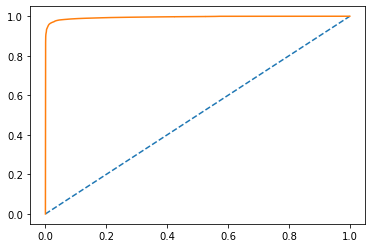

In [38]:
# Checking AUC score & plotting of ROC 

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#For plotting the curve we need the values of tpr and fpr which is calc using 
#prob values for 1 predicted by model

probabilityValues1 = model2.predict_proba(features1)[:,1]

#Calc AUC
auc = roc_auc_score(label1,probabilityValues1)
print(auc)

#Calc ROC Curve
fpr,tpr,threshold = roc_curve(label1,probabilityValues1)

#Plot Skill Line
plt.plot([0,1],[0,1], linestyle = '--')

#Plot ROC Curve
plt.plot(fpr,tpr)

In [39]:
# USING RANDOM FOREST 

In [66]:
#Seperate data with features and label
features2 = data_ups.iloc[:,:-1].values
label2 = data_ups.iloc[:,-1].values

In [67]:

#Spliting data into training and testing set 

from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2 = train_test_split(features2,
                                                label2,
                                                test_size=0.2,
                                                random_state=0)

In [68]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=0)
model3.fit(X_train2,y_train2)

RandomForestClassifier(random_state=0)

In [69]:
print(model3.score(X_train2,y_train2))
print(model3.score(X_test2,y_test2))

1.0
0.9999118989304531


In [62]:
#Checking Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(label2, model3.predict(features2))
cm2

array([[283754,     10],
       [     0, 283764]], dtype=int64)

In [70]:
#Checking Precision, Recall, F1 score

from sklearn.metrics import classification_report
print(classification_report(label2, model3.predict(features2)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283764
           1       1.00      1.00      1.00    283764

    accuracy                           1.00    567528
   macro avg       1.00      1.00      1.00    567528
weighted avg       1.00      1.00      1.00    567528

